### Project on Buisiness Analytics by Mikhail Mussel

Hi, as a part of my internship in the analytical department at Yandex.Afisha I've been tasked to help optimize marketing expenses. 

For this research I'll use: 

- Server logs with data on Yandex.Afisha visits from January 2017 through December 2018;

- Dump file with all orders for the period;

- Marketing expenses statistics.

Using this data I'll determine:

- How people use the product;

- When they start to buy;

- How much money each customer brings

- When they pay off.

Below is the explanation of our three data sets for this project.

The **visits** table (server logs with data on website visits):

    Uid — user's unique identifier
    Device — user's device
    Start Ts — session start date and time
    End Ts — session end date and time
    Source Id — identifier of the ad source the user came from
    
The **orders** table (data on orders):

    Uid — unique identifier of the user making an order
    Buy Ts — order date and time
    Revenue — Yandex.Afisha's revenue from the order
    
The **costs** table (data on marketing expenses):

    source_id — ad source identifier
    dt — date
    costs — expenses on this ad source on this day

#### Download the data and prepare it for analysis

First of all we should load and store the data, then we'll fix and optimize it for the analysis. That includes fixing column names and converting the data types.

In [1]:
# loading libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading dataset

try:
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')
except:
    orders = pd.read_csv('orders_log_us.csv')
    visits = pd.read_csv('visits_log_us.csv')
    costs = pd.read_csv('costs_us.csv')

In [3]:
# looking at data

orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [4]:
# displaying info
 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
# lowering column names and replacing spaces

orders.columns = orders.columns.str.lower().str.replace(" ", "_")

# Converting data

orders['buy_ts'] = orders['buy_ts'].astype('datetime64')

In [6]:
# checking for missing values

orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [7]:
# looking at data

visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
# lowering column names and replacing spaces

visits.columns = visits.columns.str.lower().str.replace(" ", "_")

In [9]:
# Converting data

visits['end_ts'] = visits['end_ts'].astype('datetime64')
visits['start_ts'] = visits['start_ts'].astype('datetime64')

In [10]:
# creating additional columns to help with cohort analysis

visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].values.astype('datetime64[W]')
visits['month'] = visits['start_ts'].values.astype('datetime64[M]')

In [11]:
# displaying info

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
 5   date       359400 non-null  object        
 6   week       359400 non-null  datetime64[ns]
 7   month      359400 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(1), object(2), uint64(1)
memory usage: 21.9+ MB


In [12]:
# checking for missing values

visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
date         0
week         0
month        0
dtype: int64

In [13]:
# looking at data

costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [14]:
# displaying info

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [15]:
# Converting data

costs['dt'] = costs['dt'].astype('datetime64')

In [16]:
# checking for missing values

costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [17]:
print('Missing values in ORDERS data:')
print(orders.isna().sum())
print('Missing values in VISITS data:')
print(visits.isna().sum())
print('Missing values in COSTS data:')
print(costs.isna().sum())

Missing values in ORDERS data:
buy_ts     0
revenue    0
uid        0
dtype: int64
Missing values in VISITS data:
device       0
end_ts       0
source_id    0
start_ts     0
uid          0
date         0
week         0
month        0
dtype: int64
Missing values in COSTS data:
source_id    0
dt           0
costs        0
dtype: int64


We don't have missing values in our data so let's continue on with our analysis.

#### Product
 
##### Now that we prepared the data we can start the analysis by determining our Daily, Weekly and Montly active users.

To complete this task we can group our visits table by date and save it in separate table and make a plot with it.

In [18]:
# creating table with daily active users

dau = visits.groupby('date').uid.nunique().reset_index()
dau.head()

,date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


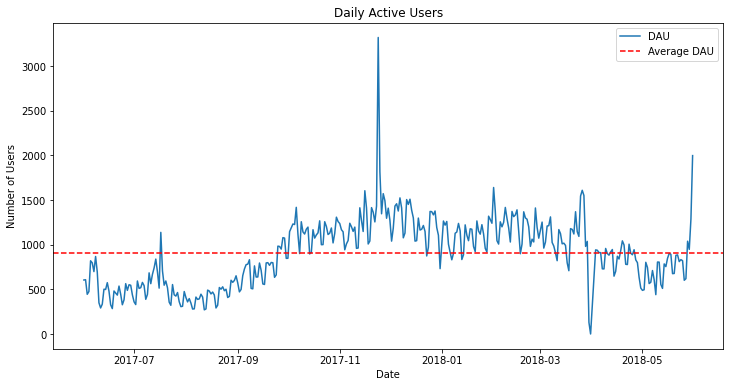

In [19]:
# visualizing the daily active users

average_dau = dau['uid'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='uid', data=dau, label='DAU')
plt.axhline(y=average_dau, color='red', linestyle='--', label='Average DAU')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Daily Active Users')

plt.legend()
plt.show()

For the daily active users we can clearly obeserve the peak of activity sometime near December of 2017. Outside of that our average for DAU is slightly less than 1000 users.

Let's repeat the same process with WAU.

In [20]:
# creating a table for weekly active users

wau = visits.groupby('week').uid.nunique().reset_index()
wau.head()

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


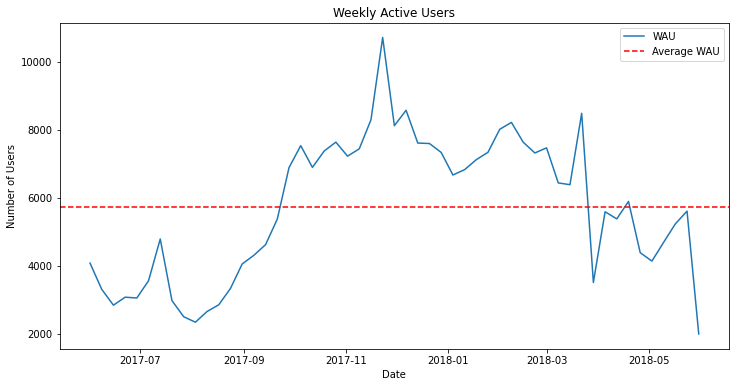

In [21]:
# visualizing the weekly active users

average_wau = wau['uid'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='uid', data=wau, label='WAU')
plt.axhline(y=average_wau, color='red', linestyle='--', label='Average WAU')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Weekly Active Users')

plt.legend()
plt.show()

As we can see our weekly active users on average are slightly less than 6000. We can notice that in August of 2017 was our lowest point of active users.

Let's see our MAU.

In [22]:
# creating a table for monthly active users

mau = visits.groupby('month').uid.nunique().reset_index()
mau.head()

,month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692


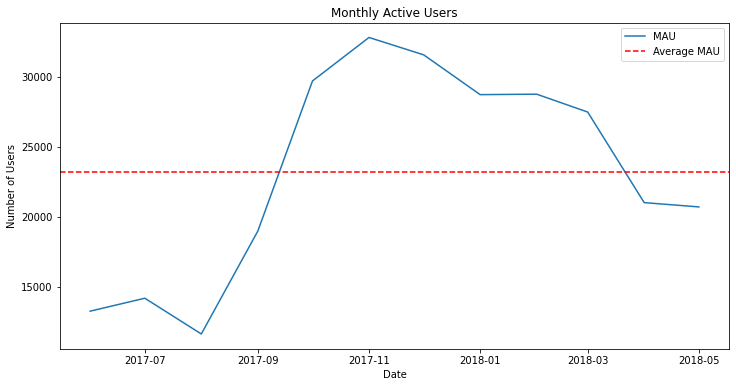

In [23]:
# visualizing the monthly active users

average_mau = mau['uid'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='uid', data=mau, label='MAU')
plt.axhline(y=average_mau, color='red', linestyle='--', label='Average MAU')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Monthly Active Users')

plt.legend()
plt.show()

So up until September of 2017 we  did not have many active users on our platform only idling at around 15000 monthly active users. But we saw quite an increase up until November of that same year. After that we've been losing some of the active users but as of May of 2018 we're still average more than 20000 of MAU.

##### How many sessions are there per day? 

Now we should determine now many session do users have per day, of course we have to keep in mind that users might have more than one session per day.

In [24]:
# creating a column in visits table for sessions per day values

visits['sessions_per_day'] = visits.groupby(['uid', 'date']).cumcount() + 1
visits[visits.sessions_per_day > 1]

,device,end_ts,source_id,start_ts,uid,date,week,month,sessions_per_day
3222,touch,2017-07-19 02:20:00,1,2017-07-19 01:25:00,13084587184621627534,2017-07-19,2017-07-13,2017-07-01,2
3354,touch,2017-09-27 22:54:00,4,2017-09-27 22:44:00,4691195548550282109,2017-09-27,2017-09-21,2017-09-01,2
3529,desktop,2018-03-27 09:16:00,5,2018-03-27 08:48:00,14358093975040773972,2018-03-27,2018-03-22,2018-03-01,2
3813,touch,2017-10-23 17:39:00,4,2017-10-23 17:39:00,1232669830621609446,2017-10-23,2017-10-19,2017-10-01,2
4094,desktop,2017-07-12 17:42:00,1,2017-07-12 17:33:00,1186757012633220834,2017-07-12,2017-07-06,2017-07-01,2
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-01,2
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-01,2
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-01,2
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-01,2


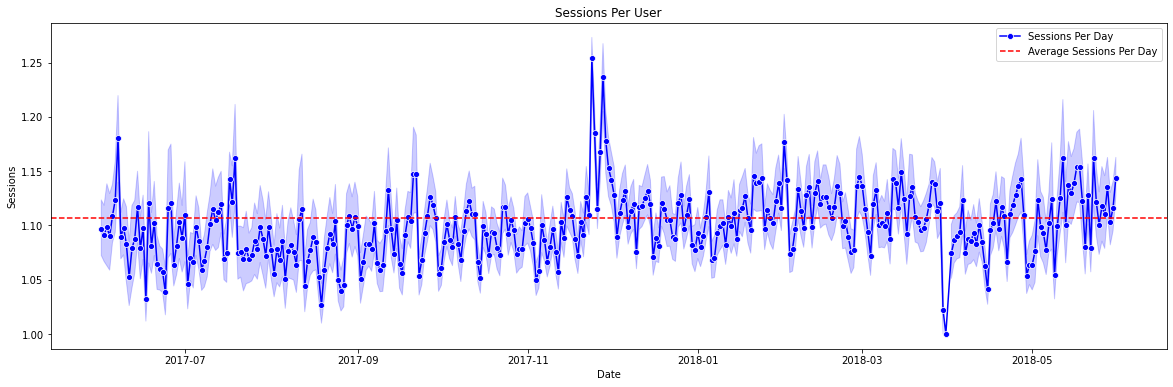

In [25]:
# visualizing session per user

average_spd = visits['sessions_per_day'].mean()
plt.figure(figsize=(20, 6))
sns.lineplot(x='date', y='sessions_per_day', data=visits, marker='o', color='blue', label='Sessions Per Day')
plt.axhline(y=average_spd, color='red', linestyle='--', label='Average Sessions Per Day')
plt.title('Sessions Per User')
plt.xlabel('Date')
plt.ylabel('Sessions')

plt.legend()
plt.show()

We don't notice anything unusual until the December of 2017, yet again we observe a big jump in activity during that time period. It's worth mentioning also the month of April of 2018 as we see a great decrease in activity during that time.

##### What is the length of each session?

We should determine the length of the sessions our users have for to help us complete our research.

In [26]:
# creating a column for session length

visits['session_length'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,sessions_per_day,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,1,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,1,0.0


In [27]:
# checking for errors in the data

visits[visits.session_length < 0]

,device,end_ts,source_id,start_ts,uid,date,week,month,sessions_per_day,session_length
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018-03-25,2018-03-22,2018-03-01,1,-1920.0
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018-03-25,2018-03-22,2018-03-01,2,-2760.0


In [28]:
# cleaning the data

visits = visits[visits['session_length'] >= 0]

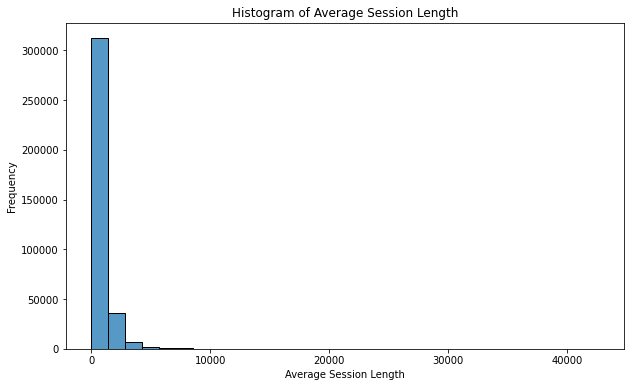

In [29]:
# visualizing the average session length

plt.figure(figsize=(10, 6))
sns.histplot(visits['session_length'], bins=30)
plt.title('Histogram of Average Session Length')
plt.xlabel('Average Session Length')
plt.ylabel('Frequency')
plt.show()

It's clear that most of the users don't spend more that 500 seconds in a single session.

#####  How often do users come back?

In other words we should find out what does our retention look like. Let's start off by determining user's first session on our platform.

In [30]:
# creating a table with unique user's first session

min_visit = visits.groupby(['uid'])['date'].min().reset_index()
min_visit.columns = ['uid', 'first_session']
min_visit.head()

,uid,first_session
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [31]:
# adding a column by merging

visits = visits.merge(min_visit, how='inner',on=['uid'])
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,sessions_per_day,session_length,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1,1080.0,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1,1680.0,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,1,0.0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1,1440.0,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,1,1680.0,2018-03-09


In [32]:
# converting data types

visits['first_session'] = pd.to_datetime(visits['first_session'])
visits['first_session'] = visits.first_session.dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,sessions_per_day,session_length,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1,1080.0,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1,1680.0,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,1,0.0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1,1440.0,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,1,1680.0,2018-03-09


We should create cohort groups in order to calculate the retention because cohort analysis will help us do that.

In [33]:
# creating a cohort column from first session and adding an age column

visits['cohort'] = visits['first_session'].values.astype('datetime64[M]')
visits['age'] = ((pd.to_datetime(visits['start_ts']) - pd.to_datetime(visits['first_session'])) / np.timedelta64(1,'M'))\
                                                                        .round().astype('int')
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,sessions_per_day,session_length,first_session,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1,1080.0,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1,1680.0,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,1,0.0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1,1440.0,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,1,1680.0,2018-03-09,2018-03-01,0


An age column is basically going to tell us how many months have passed for that user's session since his first one.

In [34]:
visits[visits.age==3].sample()

,device,end_ts,source_id,start_ts,uid,date,week,month,sessions_per_day,session_length,first_session,cohort,age
226278,touch,2018-05-18 13:11:00,4,2018-05-18 13:01:00,12324036045072432398,2018-05-18,2018-05-17,2018-05-01,1,600.0,2018-02-25,2018-02-01,3


In [35]:
# creating a pivot table for cohort analysis

cohorts = visits.pivot_table(index='cohort',
                  columns='age',
                  values='uid',
                  aggfunc='nunique').fillna(0)
cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06-01,13259.0,1006.0,708.0,813.0,924.0,875.0,864.0,735.0,742.0,660.0,557.0,535.0,187.0
2017-07-01,13140.0,753.0,676.0,708.0,745.0,633.0,602.0,638.0,493.0,385.0,329.0,75.0,0.0
2017-08-01,10181.0,719.0,627.0,604.0,527.0,426.0,429.0,347.0,295.0,237.0,37.0,0.0,0.0
2017-09-01,16704.0,1298.0,1105.0,833.0,668.0,656.0,565.0,427.0,340.0,45.0,0.0,0.0,0.0
2017-10-01,25977.0,1962.0,1361.0,1003.0,954.0,800.0,559.0,467.0,90.0,0.0,0.0,0.0,0.0
2017-11-01,27248.0,1951.0,1259.0,1061.0,870.0,651.0,511.0,77.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,25268.0,1324.0,1040.0,741.0,557.0,406.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,22624.0,1249.0,816.0,585.0,401.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,22197.0,1094.0,594.0,412.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# calculating and displaying retention table

retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06-01,1.0,0.075873,0.053398,0.061317,0.069689,0.065993,0.065163,0.055434,0.055962,0.049778,0.042009,0.040350,0.014104
2017-07-01,1.0,0.057306,0.051446,0.053881,0.056697,0.048174,0.045814,0.048554,0.037519,0.029300,0.025038,0.005708,0.000000
2017-08-01,1.0,0.070622,0.061585,0.059326,0.051763,0.041843,0.042137,0.034083,0.028976,0.023279,0.003634,0.000000,0.000000
2017-09-01,1.0,0.077706,0.066152,0.049868,0.039990,0.039272,0.033824,0.025563,0.020354,0.002694,0.000000,0.000000,0.000000
2017-10-01,1.0,0.075528,0.052393,0.038611,0.036725,0.030796,0.021519,0.017977,0.003465,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.071602,0.046205,0.038939,0.031929,0.023892,0.018754,0.002826,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.052398,0.041159,0.029326,0.022044,0.016068,0.003087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.055207,0.036068,0.025857,0.017725,0.001989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.049286,0.026760,0.018561,0.002388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


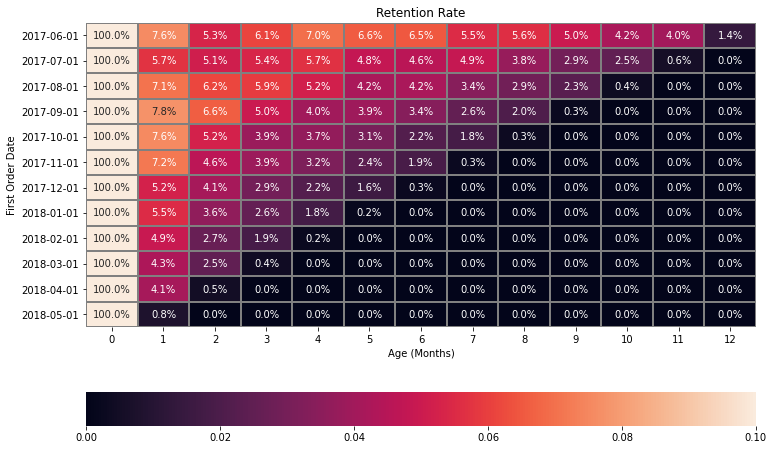

In [37]:
# visualizing retention table

retention.index=retention.index.astype(str)
plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.xlabel('Age (Months)')
plt.ylabel('First Order Date')

plt.show()

As expected, retention goes lower the further we go for almost all cohorts. But the June 2017's cohort retained significantly higher user percentage than other ones for 4-6 age period. 

The September 2017's cohort had the highest retention for the first month along side the August, October and November of that year.

#### Sales
 
##### When do people start buying? 
    
In Key Performance Indicator(KPI) analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. 

For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. 

To calculate this let's start by finding the time of the first purchase for each user.

In [38]:
# creating a table with user's first purchase  

first_order = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']
first_order.head()

,uid,first_order
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [39]:
# fixing data types

first_order['first_order'] = pd.to_datetime(first_order['first_order'])
first_order['first_order'] = first_order.first_order.dt.date

In [40]:
# merging the first purchase with first visit

first_order = first_order.merge(min_visit, how='left', on=['uid'])
first_order.head()

,uid,first_order,first_session
0,313578113262317,2018-01-03,2017-09-18
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-28,2018-01-27
4,2551852515556206,2017-11-24,2017-11-24


So now that we have a first order and first visit for each customer we can calculate the conversion.

In [41]:
# creating a conversion column

first_order['conversion']=((pd.to_datetime(first_order['first_order'])-pd.to_datetime(first_order['first_session']))/np.timedelta64(1,'D')).astype('int')
first_order.head()

,uid,first_order,first_session,conversion
0,313578113262317,2018-01-03,2017-09-18,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-28,2018-01-27,1
4,2551852515556206,2017-11-24,2017-11-24,0


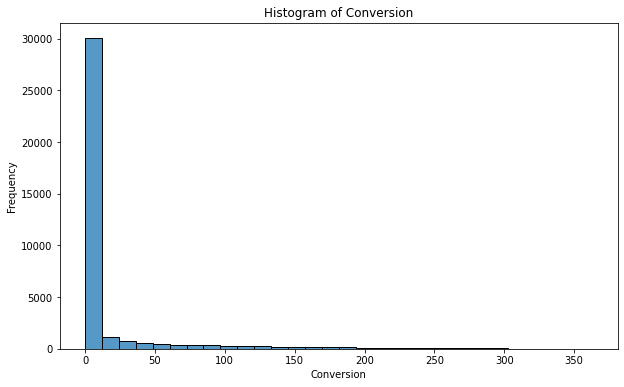

In [42]:
# visualizing the conversion

plt.figure(figsize=(10, 6))
sns.histplot(first_order['conversion'], bins=30)
plt.title('Histogram of Conversion')
plt.xlabel('Conversion')
plt.ylabel('Frequency')

plt.show()

As we can see, absolute most of our customers convert within 1-5 days though it goes up to 300 days or more for some.

In [43]:
# displaying the statistics for the conversion column

first_order.conversion.describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

In [44]:
first_order.conversion.value_counts(normalize=True)

0      0.685568
1      0.053829
2      0.018755
3      0.012376
4      0.010569
         ...   
314    0.000027
309    0.000027
299    0.000027
358    0.000027
341    0.000027
Name: conversion, Length: 349, dtype: float64

In [45]:
# prining the total conversion

print(' The overall conversion is {:.1%}'.format(orders['uid'].nunique()/visits['uid'].nunique()))

 The overall conversion is 16.0%


Thus we conclude that 16% of our visitors have become our customers in the end.

##### How many orders do they make during a given period of time?



We will use cohort analysis for this task since it provides us with clear values for different time periods.

In [46]:
# creating a cohort column

first_order['first_order_month'] = first_order['first_order'].values.astype('datetime64[M]')
first_order.head()

,uid,first_order,first_session,conversion,first_order_month
0,313578113262317,2018-01-03,2017-09-18,107,2018-01-01
1,1575281904278712,2017-06-03,2017-06-03,0,2017-06-01
2,2429014661409475,2017-10-11,2017-10-11,0,2017-10-01
3,2464366381792757,2018-01-28,2018-01-27,1,2018-01-01
4,2551852515556206,2017-11-24,2017-11-24,0,2017-11-01


In [47]:
# creating a table with cohort sizes

cohort_sizes = first_order.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month','cohort_size']
cohort_sizes.head()

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [48]:
# fixing the datatytpe

orders['month'] = orders['buy_ts'].values.astype('datetime64[M]')

In [49]:
# merging the first order back to orders

orders = orders.merge(first_order, how='left', on=['uid'])
orders.head()

,buy_ts,revenue,uid,month,first_order,first_session,conversion,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01


In [50]:
# creating a cohort table

cohort = orders.groupby(['first_order_month','month'])['uid'].count().reset_index()
cohort.columns = ['first_order_month','month','orders']
cohort

,first_order_month,month,orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195
77,2018-05-01,2018-05-01,3249


In [51]:
# adding useful column to cohort table

cohort = cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age_month'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer'] = cohort['orders']/cohort['cohort_size']
cohort.head()

,first_order_month,month,orders,cohort_size,age_month,orders_per_buyer
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340


In [52]:
# creating a cohort pivot table 

cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


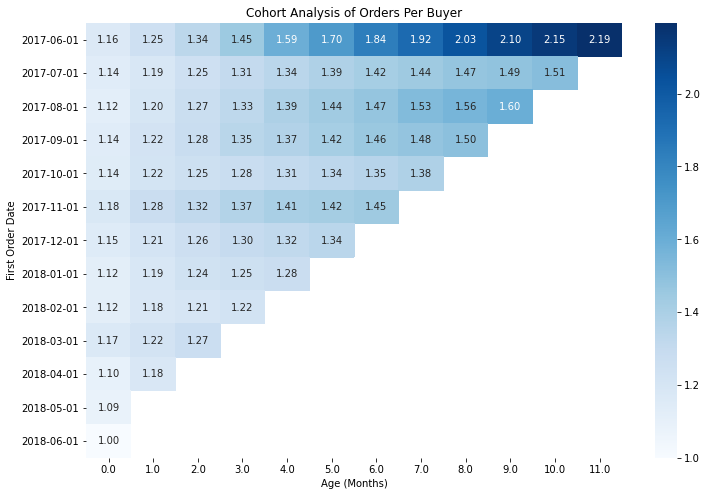

In [53]:
# visualizing the orders per buyer

cohort_piv.index = cohort_piv.index.date
plt.figure(figsize=(12, 8))
sns.heatmap(data=cohort_piv, annot=True, fmt=".2f", cmap='Blues')
plt.title('Cohort Analysis of Orders Per Buyer')
plt.xlabel('Age (Months)')
plt.ylabel('First Order Date')

plt.show()

On the Y axis we have our cohorts and on the X axis we have age parameter which represents how many months has passed for each cohort. And the values are ammount of orders per buyer.

We can see that our first cohort of June 2017 had the most orders per buyer in 4 months and only kept going up from that point onwards.

##### What is the average purchase size?

Here is the same logic, just instead of orders per user we're using average check. In our case price will be used to calculate average check.

In [54]:
# creating a table for average check

avg_check = orders.groupby(['uid'])['revenue'].sum().reset_index()
avg_check

,uid,revenue
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99
...,...,...
36518,18445147675727495770,3.05
36519,18445407535914413204,0.88
36520,18445601152732270159,4.22
36521,18446156210226471712,9.78


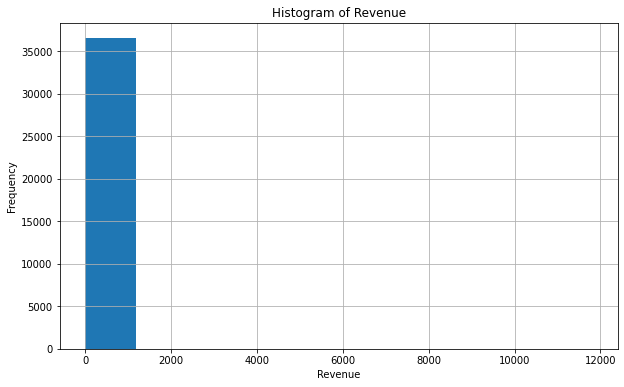

In [55]:
# visualizing the revenue

plt.figure(figsize=(10, 6))
avg_check.revenue.hist()
plt.title('Histogram of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.show()

In [56]:
# displaying statistics for average check

avg_check.revenue.describe()

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: revenue, dtype: float64

In [57]:
# creating cohort groups for average revenue

avg_cohort = orders.groupby(['first_order_month','month'])['revenue'].mean().reset_index()
avg_cohort['age_month'] = ((avg_cohort['month'] - avg_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
avg_cohort.head()

,first_order_month,month,revenue,age_month
0,2017-06-01,2017-06-01,4.060106,0.0
1,2017-06-01,2017-07-01,5.547006,1.0
2,2017-06-01,2017-08-01,5.088161,2.0
3,2017-06-01,2017-09-01,8.545575,3.0
4,2017-06-01,2017-10-01,7.084178,4.0


In [58]:
# creating a pivot table for average revenue cohorts

avg_cohort_piv = avg_cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean'
)

avg_cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,
2017-08-01,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.7,5.6,,
2017-09-01,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,,,
2017-10-01,4.37,7.41,5.13,5.59,5.1,5.07,4.28,4.01,,,,
2017-11-01,4.37,4.1,4.47,6.28,4.44,3.73,4.6,,,,,
2017-12-01,4.11,4.23,20.07,26.08,15.95,14.11,,,,,,
2018-01-01,3.69,4.44,6.45,7.52,2.71,,,,,,,
2018-02-01,3.71,4.58,3.45,3.87,,,,,,,,


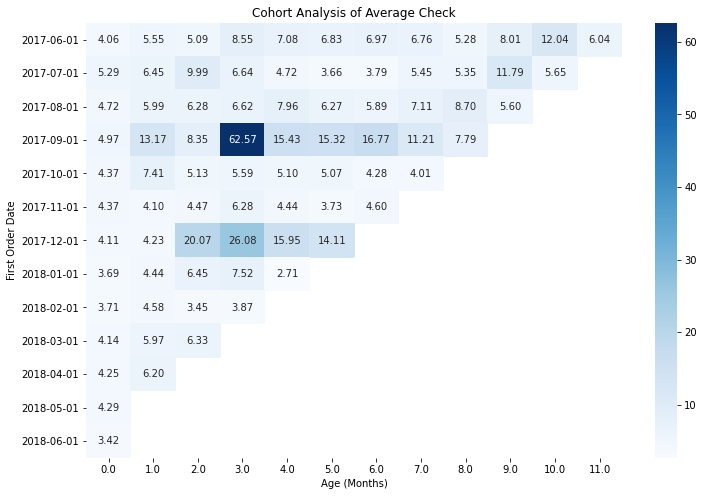

In [59]:
# visualizing the average check

avg_cohort_piv.index = avg_cohort_piv.index.date
plt.figure(figsize=(12, 8))
sns.heatmap(data=avg_cohort_piv, annot=True, fmt=".2f", cmap='Blues')
plt.title('Cohort Analysis of Average Check')
plt.xlabel('Age (Months)')
plt.ylabel('First Order Date')

plt.show()

We can see that September 2017's cohort had a massive check in December and also the December 2017's cohort had a noticable increase in February and January of 2018.

##### How much money do they bring? (LTV)

In [60]:
# geting the revenue per cohort in each month

ltv_cohort = orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']
ltv_cohort

,first_order_month,month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [61]:
# merging with the cohort size

ltv_cohort = ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort

,first_order_month,month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2.0,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0.0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1.0,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0.0,4.660562


In [62]:
# creating a pivot table for LTV

ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1).fillna(0)
ltv_cohort_piv

age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,0.000000
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,0.000000,0.000000
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,0.000000,0.000000,0.000000
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,0.000000,0.000000,0.000000,0.000000
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,4.156987,4.435262,4.513777,4.587921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


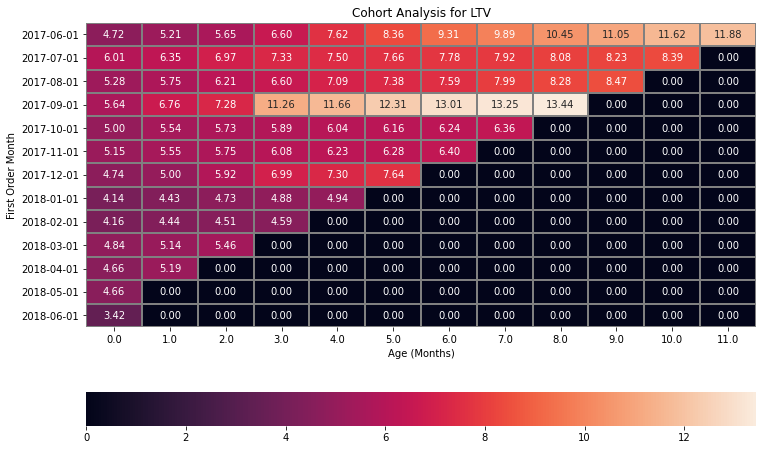

In [63]:
# visualizing the LTV 

ltv_cohort_piv.index = ltv_cohort_piv.index.astype(str)
plt.figure(figsize=(12,8))
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='Cohort Analysis for LTV')
plt.xlabel('Age (Months)')
plt.ylabel('First Order Month')

plt.show()

Once again we notice same increase for September 2017's cohort in month of December and onwards. Same goes for June 2007's cohort in December onwards but not as much.

#### Marketing

##### How much money was spent? Overall/per source/over time

In [64]:
# sorting cost for futher visualization

marketing = costs.sort_values(by=['dt','source_id'])
marketing.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
363,2,2017-06-01,132.56
726,3,2017-06-01,349.38
1089,4,2017-06-01,76.74
1452,5,2017-06-01,73.24


In [65]:
# printing total costs

print('Total marketing cost is {}'.format(marketing['costs'].sum()))

Total marketing cost is 329131.62


In [66]:
# creating new table to see costs distribution by source

marketing_per_source = marketing.groupby(['source_id'])['costs'].sum().reset_index()
marketing_per_source.head()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


In [67]:
# which device has more time spent?

devices_sum = visits[['device', 'uid', 'source_id','session_length']]
devices_sum = devices_sum.groupby(['device'])['session_length'].sum().reset_index()
devices_sum

,device,session_length
0,desktop,184665126.0
1,touch,46442986.0


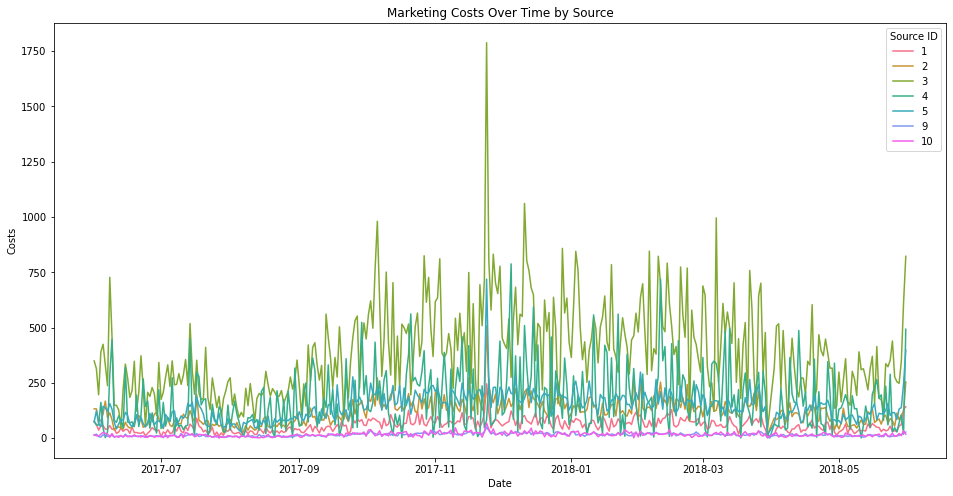

In [68]:
# visualizing the marketing costs per source

plt.figure(figsize=(16, 8))
palette = sns.color_palette("husl", n_colors=len(marketing['source_id'].unique()))
sns.lineplot(x='dt', y='costs', hue='source_id', data=marketing, palette=palette)
plt.title('Marketing Costs Over Time by Source')
plt.xlabel('Date')
plt.ylabel('Costs')
plt.legend(title='Source ID')

plt.show()

As we can see here, source 3 has clear peak after November of 2017. This source seems to be highest among the other sources that we have.

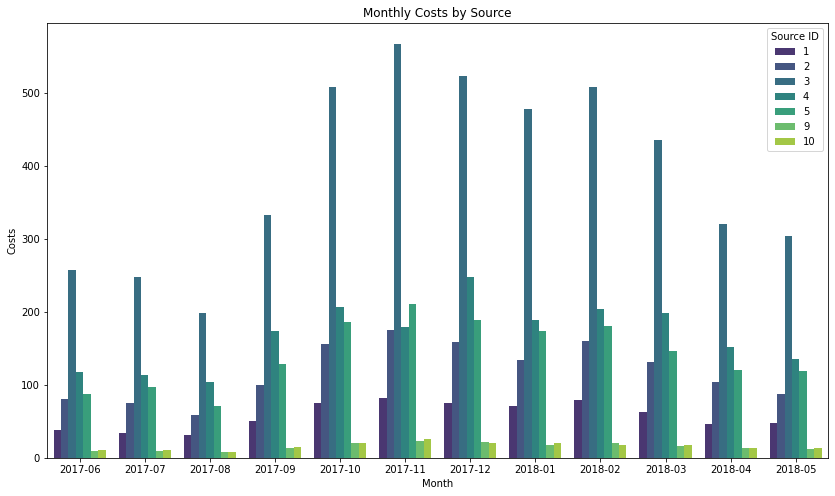

In [69]:
# visualizing the marketing costs per source by month

marketing['dt'] = pd.to_datetime(marketing['dt']).dt.to_period('M')
plt.figure(figsize=(14, 8))
sns.barplot(data=marketing, x='dt', y='costs', hue='source_id', ci=None, palette='viridis')
plt.title('Monthly Costs by Source')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.legend(title='Source ID')

plt.show()

##### How much did customer acquisition from each of the sources cost?

In [70]:
# creating the month column

marketing['month'] = marketing['dt'].values.astype('datetime64[M]')
marketing.head()

,source_id,dt,costs,month
0,1,2017-06,75.20,2017-06-01
363,2,2017-06,132.56,2017-06-01
726,3,2017-06,349.38,2017-06-01
1089,4,2017-06,76.74,2017-06-01
1452,5,2017-06,73.24,2017-06-01


In [71]:
# creating marketing costs by month table

marketing_by_month = marketing.groupby(['month'])['costs'].sum().reset_index()
marketing_by_month.columns = ['cost_month', 'costs']
marketing_by_month.head()

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [72]:
# creating the buyers by month table

buyers_per_moth = orders.groupby(['first_order_month'])['uid'].nunique().reset_index()
buyers_per_moth.columns = ['cost_month','buyers']
buyers_per_moth.head()

,cost_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [73]:
# creating the Customer Acquisition Cost table

CAC_per_month = marketing_by_month.merge(buyers_per_moth,how='left',on=['cost_month'])
CAC_per_month['CAC'] = CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

,cost_month,costs,buyers,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327


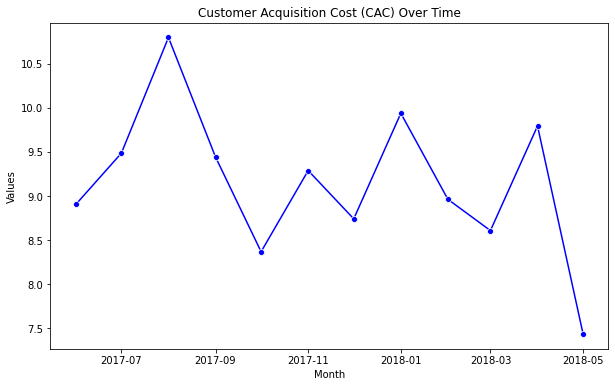

In [74]:
# visualizing the CAC

plt.figure(figsize=(10, 6))
sns.lineplot(x='cost_month', y='CAC', data=CAC_per_month, marker='o', color='blue')
plt.title('Customer Acquisition Cost (CAC) Over Time')
plt.xlabel('Month')
plt.ylabel('Values')

plt.show()

Highest acquisition costs are in December 2017.

##### CAC per source

We want to determine which source has the highest Customer Acquisition Cost in order to reach our research goal. In order to calculate CAC per source we need to know the original source of the user. If we check our original dataset we will see that users can come from different sources.

In [75]:
# creating the table with user's first source

first_source = visits.sort_values('date').groupby('uid').first()['source_id'].reset_index()
first_source.columns = ['uid','first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [76]:
# merging first source with orders

orders = orders.merge(first_source,on=['uid'],how='left')
orders.head()

,buy_ts,revenue,uid,month,first_order,first_session,conversion,first_order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,3


In [77]:
# sorting cohorts with sources and costs

marketing_by_month_source = marketing.groupby(['month','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [78]:
# sorting cohorts with first month and sources

buyers_per_month_source = orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns = ['month','source_id','buyers']
buyers_per_month_source.head()

,month,source_id,buyers
0,2017-06-01,1,215
1,2017-06-01,2,231
2,2017-06-01,3,627
3,2017-06-01,4,401
4,2017-06-01,5,392


In [79]:
# actual cac calculations

CAC_per_month_source = marketing_by_month_source.merge(buyers_per_month_source,how='left',on=['month','source_id'])
CAC_per_month_source['CAC'] = CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

,month,source_id,costs,buyers,CAC
0,2017-06-01,1,1125.61,215,5.235395
1,2017-06-01,2,2427.38,231,10.508139
2,2017-06-01,3,7731.65,627,12.331180
3,2017-06-01,4,3514.80,401,8.765087
4,2017-06-01,5,2616.12,392,6.673776


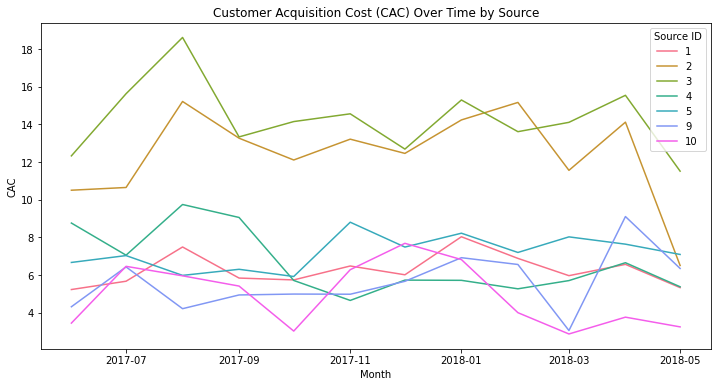

In [80]:
# visualizing CAC by source

custom_palette = sns.color_palette("husl", n_colors=len(CAC_per_month_source['source_id'].unique()))
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='CAC', hue='source_id', data=CAC_per_month_source, palette=custom_palette)
plt.title('Customer Acquisition Cost (CAC) Over Time by Source')
plt.xlabel('Month')
plt.ylabel('CAC')
plt.legend(title='Source ID')

plt.show()

Sources 2 and 3 seem to have the highest CAC's over the others. Also notice the steep rise of 2nd source at the start and 3rd source's dramatic downfall at the end. 

##### How worthwhile where the investments? (ROI)

As part of the final task to help optimize marketing expenses we need to see our ROI in cohort analysis and compare it with ROI by marketing source. 

To calculate Return On Investment we need to divide LifeTime Value by Customer Acquisition Cost.

In [81]:
# creating table for ROI

CAC_per_month_ROI = CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns = ['first_order_month','CAC']
ROI = ltv_cohort.merge(CAC_per_month_ROI,on = ['first_order_month'],how='left')
ROI.head()

,first_order_month,month,revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531,8.905091


In [82]:
# creating a column with ROI values

ROI['ROI'] = ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ROI', 
    aggfunc='mean'
).cumsum(axis=1).round(2) 

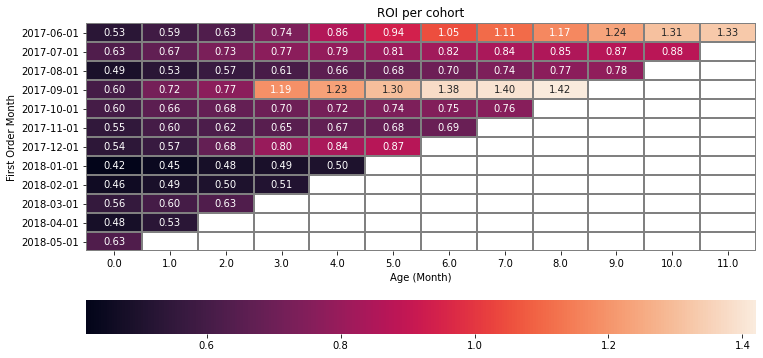

In [83]:
# visualizing the ROI per cohort

roi_piv.index = roi_piv.index.astype(str)
plt.figure(figsize=(12, 6))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.xlabel('Age (Month)')
plt.ylabel('First Order Month')

plt.show()

Same pattern that we have been noticing from before. June 2017's cohort saw major inreases starting from month of November. And September 2017's cohort saw even greater spike from month of December 2017 up to May 2018. While January and February 2018's cohorts saw the least of ROIs.

In [84]:
# creating a table for LTV per source

ltv_per_source = orders.groupby(['first_source'])[['uid','revenue']].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns = ['source_id','buyers','revenue']
ltv_per_source['ltv'] = ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

,source_id,buyers,revenue,ltv
0,1,3343,35436.83,10.600308
1,2,3537,44346.68,12.537936
2,3,10109,51943.55,5.138347
3,4,10015,55381.50,5.529855
4,5,7164,54783.88,7.647108
5,7,1,1.22,1.220000
6,9,1049,5517.67,5.259933
7,10,1305,4645.87,3.560054


In [85]:
# mergring LTV and marketing 

roi_per_source = marketing_per_source.merge(ltv_per_source,on=['source_id'])
roi_per_source

,source_id,costs,buyers,revenue,ltv
0,1,20833.27,3343,35436.83,10.600308
1,2,42806.04,3537,44346.68,12.537936
2,3,141321.63,10109,51943.55,5.138347
3,4,61073.60,10015,55381.50,5.529855
4,5,51757.10,7164,54783.88,7.647108
5,9,5517.49,1049,5517.67,5.259933
6,10,5822.49,1305,4645.87,3.560054


In [86]:
# calculating CAC and ROMI columns per source

roi_per_source['cac']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

,source_id,costs,buyers,revenue,ltv,cac,romi
0,1,20833.27,3343,35436.83,10.600308,6.231908,1.700973
1,2,42806.04,3537,44346.68,12.537936,12.102358,1.035991
2,3,141321.63,10109,51943.55,5.138347,13.979783,0.367556
3,4,61073.60,10015,55381.50,5.529855,6.098213,0.906799
4,5,51757.10,7164,54783.88,7.647108,7.224609,1.058480
5,9,5517.49,1049,5517.67,5.259933,5.259762,1.000033
6,10,5822.49,1305,4645.87,3.560054,4.461678,0.797918


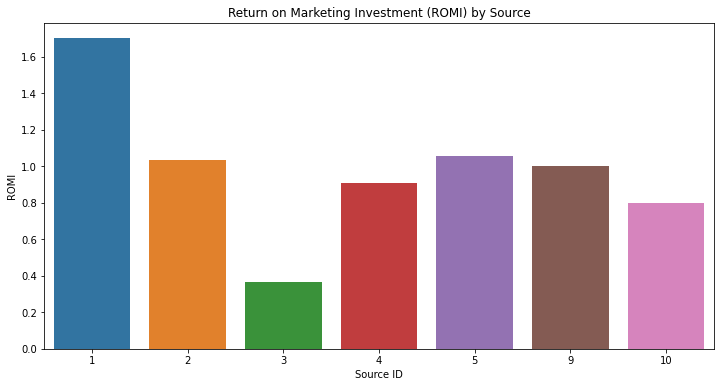

In [87]:
# visualizing the ROMI by source

plt.figure(figsize=(12, 6))
sns.barplot(x='source_id', y='romi', data=roi_per_source)
plt.title('Return on Marketing Investment (ROMI) by Source')
plt.xlabel('Source ID')
plt.ylabel('ROMI')

plt.show()

##### Conclusion.

Going from left to right we have our biggest in terms of returns - Source 1 has clearly outperformed the others.

2nd source has more in line with sources 4,5,9 and 10.

3rd source has clearly underperformed, I would consider again it's usefulness on the platform.

Sources 4,5,9 are more of the average sort with source 10 being the lowest among those.

Source 3 was the most expensive and least rewarding according to marketing costs over time and lowest return on marketing investment. It did have the highest count of buyers but I think it was due the fact that it had the highest marketing cost of all the sources and it's revenue value did not quite match up to the cost. We also took notice that it's costs spiked in December 2017 which probably correlated to New Year activity, still I would not consider this source to be profitable.

Source 2 also had around the same CAC as source 3 but as we can see source 2 actually has been decent on returns compared to source 3. Second source also has double the third source's LTV. But this source's high CAC is making be question it's reliability. 

Source 1 has great metrics and I consider it very profitable.

Source 4,5 are the middle of the pack good, not amazing but still positive returns overall.

Source 9 while has made decents profits did not however convert a lot of customers. But it is to be expected from lower funded sources. I still consider this source to be profitable.

Source 10 had a similar story to the previous one but sadly it did not perfom as well as source 9 so I wouldn't consider this one to be profitable.

In the end my recomendations would be to cut non-proftable sources all together and redistribute costs among non-leading sources.